# Prática Supervisionada
## Misturando aprendizagem supervisionada com não supervisionada

Agora vamos trabalhar com um cenário que é bem comum quando lidamos com dados, especialmente dados do contexdo de crédito bancário.

O dataset no arquivo *default of credit card clients.csv* contém dados sobre créditos bancários, onde temos um atributo de ID do cliente, 23 atributos de perfil caracterizando o cliente e um informando se o crédito foi aprovado ou não.

In [1]:
import pandas as pd
df = pd.read_csv("default of credit card clients.csv")
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Vamos tentar aprender, utilizando o *kNN*, se um cliente vai (**1**) ou não (**0**) ter crédito aprovado. Vamos não, **você vai**, até porque é você quem está praticando!

Dica: será que devemos usar todos os atributos?

In [28]:
data = df.values[:,1:]

from math import floor
import numpy as np

np.random.shuffle(balanced_data)

train_size = floor(0.8 * data.shape[0])
train_data = data[:train_size,:]
test_data = data[train_size:,:]

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(train_data[:, 0:-1], train_data[:, -1])
model.score(test_data[:,0:-1], test_data[:,-1])

0.7681666666666667

É, até que esse é um resultado aceitável, mas será que dá pra melhorar?

O que será que é normal para um banco? Dar muito crédito? Negar muito crédito? Um pouco dos dois? Se nosso banco em questão sempre aceitar ou negar crédito, fica muito fácil aprender, correto? Vamos analisar esses dados (quando digo vamos, quero dizer você, ok?): quantos créditos foram aprovados e quantos foram negados?

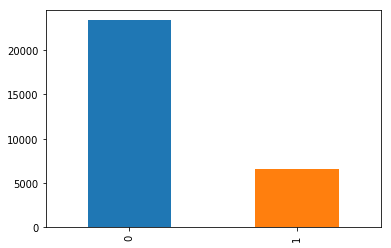

In [5]:
%matplotlib inline
df["Y"].value_counts().plot(kind="bar")

Ok, temos um problema. A quantidade de dados de créditos negados é **bem maior** que a de créditos aprovados. E agora? É provável que nosso modelo tenha aprendido errado! Ele pode estar sempre chutando que o crétido foi negado, e isso não é bom! Como que podemos resolver isso?

## Prototipação

Poxa, seria bem legal se a gente(você) conseguisse equilibrar as quantidades, perrmitindo um **balanceamento** do dado, certo? Como que podemos fazer isso?

Uma maneira bem ingênua e intuitiva é pegar apenas uma parcela do dado, mas isso não é algo inteligente. Muitos cientistas de dados gostariam de ter **muitos** dados, pois dados podem virar informação. Logo, descartar dados é uma péssima ideia.

E se houvesse uma maneira de representar os dados utilizando menos dados ou selecionando um subgrupo, porém que fosse representativo daquele conjunto de dados? Mas como podemos gerar essas informações *representativas*?

$$\textit{Clusters}$$

Opa, é uma ótima ideia! Digo, um cluster consegue representar um grupo de dados, certo? E se tentássemos(você) clusterizar os dados dos clientes em, digamos 7000 dados? Dessa maneira, os 7000 clusteres gerados representariam todos os 23000 dados! 

Mãos à obra!

In [15]:
data_0 = df[df["Y"] == 0].values[:,1:]

from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=7000, max_iter=1)
cluster_model.fit(data_0[:,0:-1])
cluster_model.cluster_centers_

array([[1.70000000e+05, 1.66666667e+00, 1.66666667e+00, ...,
        2.42388889e+02, 5.11694444e+02, 1.49916667e+03],
       [2.70000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        2.50000000e+04, 1.50000000e+04, 1.50000000e+04],
       [1.00000000e+05, 1.75000000e+00, 1.91666667e+00, ...,
        1.82608333e+03, 1.16741667e+03, 2.08600000e+03],
       ...,
       [3.00000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        5.01400000e+03, 2.00000000e+03, 1.00000000e+03],
       [7.50000000e+04, 2.00000000e+00, 2.50000000e+00, ...,
        2.82200000e+03, 1.71640000e+04, 1.62500000e+03],
       [1.32500000e+05, 1.50000000e+00, 1.50000000e+00, ...,
        4.08637500e+03, 3.70162500e+03, 2.92125000e+03]])

In [26]:
prototiped_data = np.c_[cluster_model.cluster_centers_, np.zeros(7000)]
prototiped_data.shape

balanced_data = np.r_[prototiped_data, df[df["Y"]==1].values[:,1:]]
balanced_data.shape

(13636, 24)

Agora que temos os clusteres, podemos(você) treinar o modelo utilizando os clusteres e os dados de crédito aprovado. Será que o resultado vai ser melhor? Descubra!

In [29]:
np.random.shuffle(balanced_data)
train_size = floor(0.8 * balanced_data.shape[0])
train_data = balanced_data[:train_size,:]
test_data = balanced_data[train_size:,:]

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(train_data[:, 0:-1], train_data[:, -1])
model.score(test_data[:,0:-1], test_data[:,-1])

0.780791788856305

Então, ficou melhor o resultado? Bom, uma certeza que temos é que nós ficamos com **menos dados**, logo, nosso *kNN* é capaz de rodar de maneira mais rápida, concorda? Então, perdendo ou não um pouco na acurácia do modelo, isso pode acabar valendo a pena em termos de recursos computacionais.

## Nada é tão bom que não possa melhorar


Experimente agora melhorar o resultado do *kNN*. Utilize algumas das técnicas vistas até agora no curso (ou as que 
você viu mais na frente, caso esteja revendo o material) para melhorar a acurácia do seu modelo. Algumas ideias:

* Mudar o algoritmo de clusterização
* Reduzir a dimensão dos dados
* Dividir os dados completos em uma mesma proporção de créditos aprovados e negados